In [ ]:
## EDA for UCB Project 1

In [10]:
#Dependencies & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [11]:
##Importing raw data and formatting into dataframes
fat_data = pd.read_csv(("Raw Data/Fat_Supply_Quantity_Data.csv"))
protein_data = pd.read_csv("Raw Data/Protein_Supply_Quantity_Data.csv")
calorie_data = pd.read_csv("Raw Data/Food_Supply_kcal_Data.csv")
weight_data = pd.read_csv("Raw Data/Food_Supply_Quantity_kg_Data.csv")

In [12]:
##Removing non-values
fat_data = fat_data.dropna(subset=["Obesity","Confirmed"])
protein_data = protein_data.dropna(subset=["Obesity","Confirmed"])
calorie_data = calorie_data.dropna(subset=["Obesity","Confirmed"])
weight_data = weight_data.dropna(subset=["Obesity","Confirmed"])

In [13]:
#View reamining data
fat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       163 non-null    object 
 1   Alcoholic Beverages           163 non-null    float64
 2   Animal Products               163 non-null    float64
 3   Animal fats                   163 non-null    float64
 4   Aquatic Products, Other       163 non-null    float64
 5   Cereals - Excluding Beer      163 non-null    float64
 6   Eggs                          163 non-null    float64
 7   Fish, Seafood                 163 non-null    float64
 8   Fruits - Excluding Wine       163 non-null    float64
 9   Meat                          163 non-null    float64
 10  Miscellaneous                 163 non-null    float64
 11  Milk - Excluding Butter       163 non-null    float64
 12  Offals                        163 non-null    float64
 13  Oilcrops  

In [14]:
##Creating Global Average Values
gaverage_obesity = fat_data["Obesity"].mean()
gaverage_confirmed = fat_data["Confirmed"].mean()
gaverage_deaths = fat_data["Deaths"].mean()
gaverage_recovered = fat_data["Recovered"].mean()
gaverage_active = fat_data["Active"].mean()

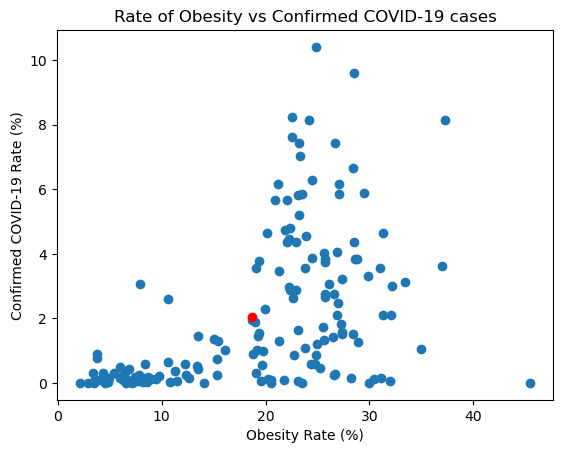

In [15]:
##Create rough scatterplot showing relationship between obesity and covid
x_values = fat_data["Obesity"]
y_values = fat_data['Confirmed']
plt.scatter(x_values, y_values)
plt.title("Rate of Obesity vs Confirmed COVID-19 cases")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot
plt.plot(gaverage_obesity, gaverage_confirmed, marker="o", color="red")

plt.show()

The r-squared is: 0.2647980987594157


2.1135787386808824e-12

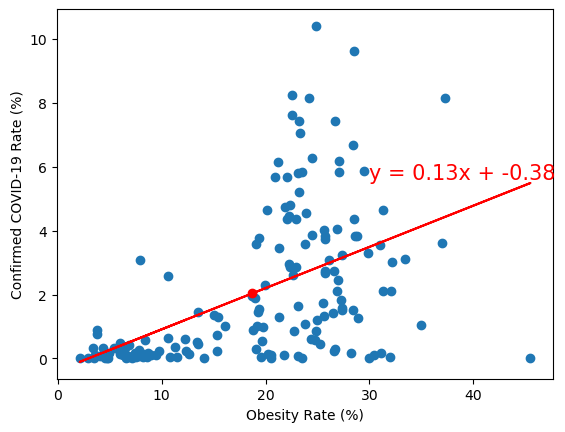

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.plot(gaverage_obesity, gaverage_confirmed, marker="o", color="red")
plt.annotate(line_eq,(30,5.6),fontsize=15,color="red")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")
print(f"The r-squared is: {rvalue**2}")

pvalue




In [17]:
##Summary Stats for obesity
obesity = fat_data["Obesity"]
confirmed = fat_data["Confirmed"]
deaths = fat_data["Deaths"]
recovered = fat_data["Recovered"]
active = fat_data["Active"]

# Demonstrate calculating the variance and standard deviation for Obesity using the different modules
var_numpy = np.var(obesity,ddof = 0)
sd_numpy = np.std(obesity,ddof = 0)

print(f"The variance for obesity is {var_numpy}")
print(f"The standard deviation for obesity is {sd_numpy}")
print(f"Roughly 68% of the data is between {round(gaverage_obesity-sd_numpy,3)} and {round(gaverage_obesity+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(gaverage_obesity-2*sd_numpy,3)} and {round(gaverage_obesity+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(gaverage_obesity-3*sd_numpy,3)} and {round(gaverage_obesity+3*sd_numpy,3)}")

The variance for obesity is 88.20306597914862
The standard deviation for obesity is 9.391648735932824
Roughly 68% of the data is between 9.31 and 28.093
Roughly 95% of the data is between -0.082 and 37.485
Roughly 99.7% of the data is between -9.474 and 46.876


In [18]:
z_obesity = st.zscore(obesity)
z_obesity.describe()

count    1.630000e+02
mean    -8.173421e-17
std      1.003082e+00
min     -1.767658e+00
25%     -1.070230e+00
50%      2.767111e-01
75%      7.452124e-01
max      2.853468e+00
Name: Obesity, dtype: float64

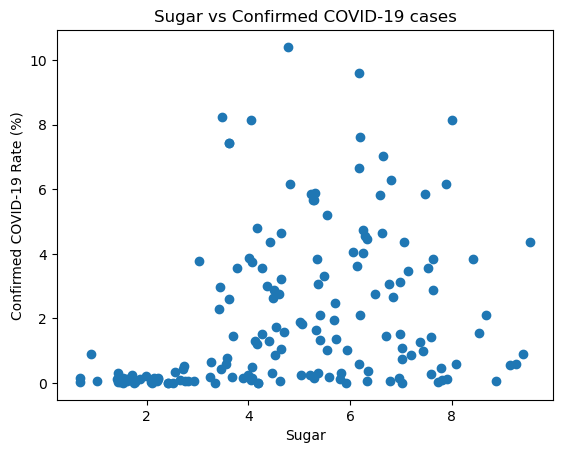

In [19]:
##Create rough scatterplot showing relationship between obesity and covid
x_values = calorie_data["Sugar & Sweeteners"]
y_values = calorie_data['Confirmed']
plt.scatter(x_values, y_values)
plt.title("Sugar vs Confirmed COVID-19 cases")
plt.xlabel("Sugar")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot


plt.show()

The r-squared is: 0.09273011034365727


7.744856005577631e-05

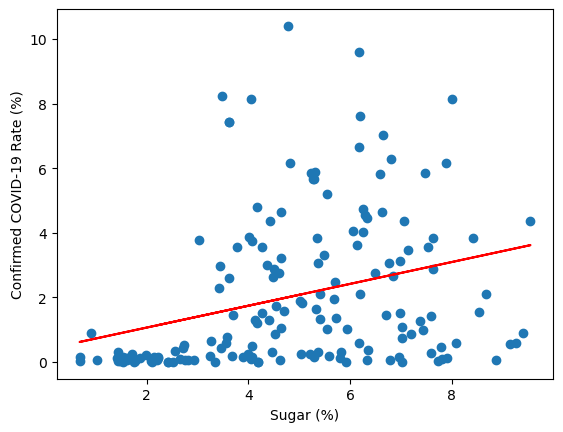

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Sugar (%)")
plt.ylabel("Confirmed COVID-19 Rate (%)")
print(f"The r-squared is: {rvalue**2}")

pvalue

In [21]:
fat_data["Undernourished"].value_counts()

Undernourished
<2.5    44
16.5     3
6.2      3
7.9      2
13.4     2
        ..
15.2     1
10.2     1
10.5     1
3.7      1
51.3     1
Name: count, Length: 94, dtype: int64

In [22]:
df = fat_data.copy()

# Replace '>2.5' with '2.5' and 'NA' with NaN (missing data)
df['Undernourished'] = df['Undernourished'].replace('>2.5', '2.5').replace('NA', pd.NA, regex=True)

# Convert the column to numeric
df['Undernourished'] = pd.to_numeric(df['Undernourished'], errors='coerce')

<Axes: >

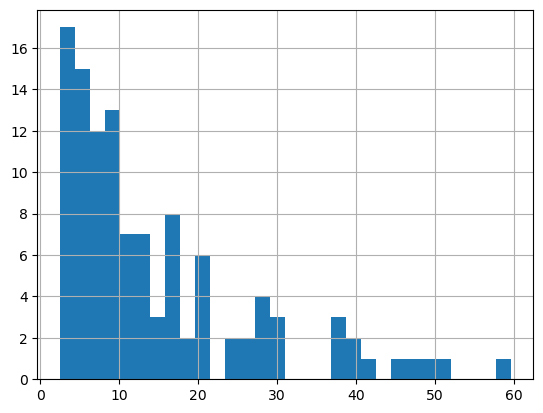

In [23]:
df["Undernourished"].hist(bins=30)

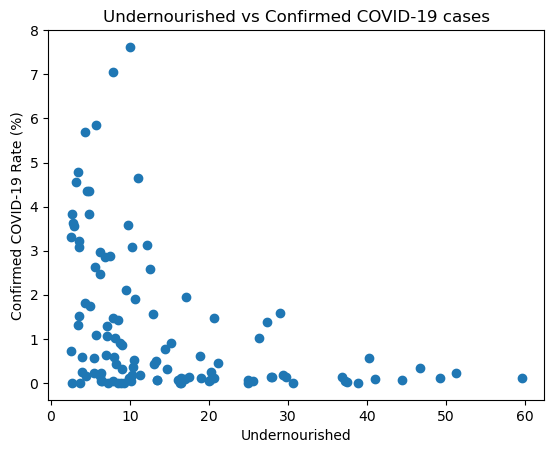

The r-squared is: nan


nan

In [36]:
##Create rough scatterplot showing relationship between obesity and covid
x_values = df["Undernourished"]
y_values = calorie_data['Confirmed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.title("Undernourished vs Confirmed COVID-19 cases")
plt.xlabel("Undernourished")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot


plt.show()
print(f"The r-squared is: {rvalue**2}")

pvalue

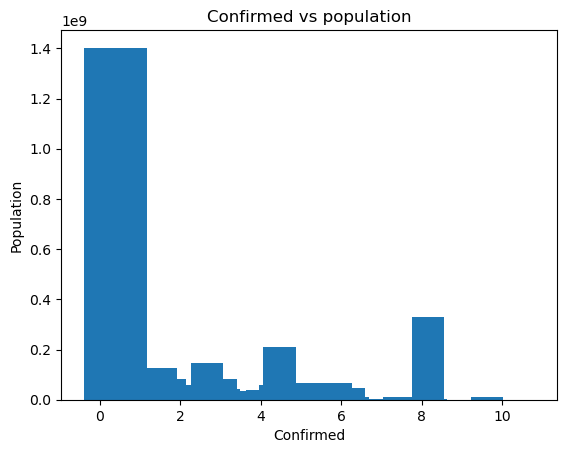

In [31]:
##Create rough scatterplot showing relationship between obesity and covid
x_values = calorie_data["Confirmed"]
y_values = calorie_data['Population']
plt.bar(x_values,y_values)
plt.title("Confirmed vs population")
plt.xlabel("Confirmed")
plt.ylabel("Population")

##Add global average values to plot


plt.show()


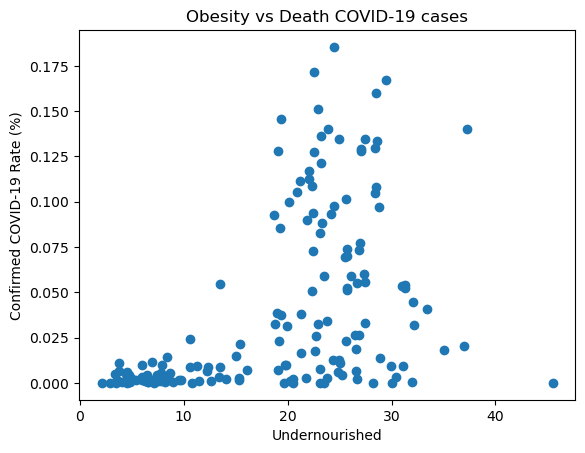

In [40]:
x_values = calorie_data['Obesity']
y_values = calorie_data['Deaths']
plt.scatter(x_values, y_values)
plt.title("Obesity vs Death COVID-19 cases")
plt.xlabel("Undernourished")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot


plt.show()


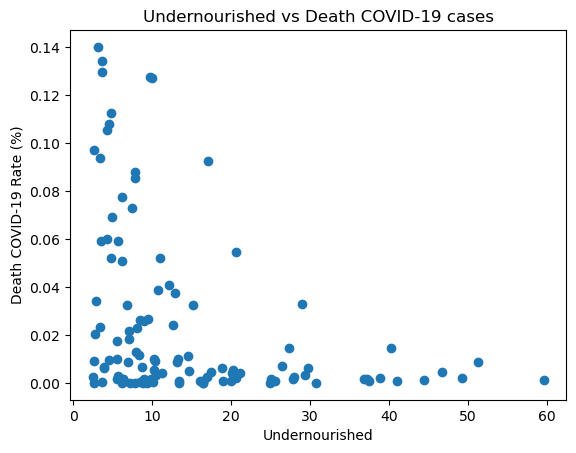

In [41]:
x_values = df['Undernourished']
y_values = calorie_data['Deaths']
plt.scatter(x_values, y_values)
plt.title("Undernourished vs Death COVID-19 cases")
plt.xlabel("Undernourished")
plt.ylabel("Death COVID-19 Rate (%)")

##Add global average values to plot


plt.show()

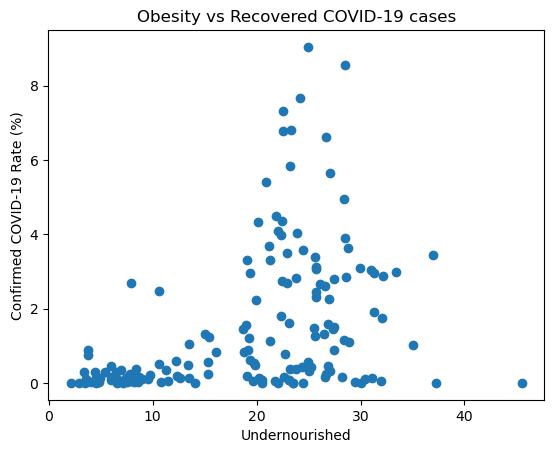

In [44]:
x_values = calorie_data['Obesity']
y_values = calorie_data['Recovered']
plt.scatter(x_values, y_values)
plt.title("Obesity vs Recovered COVID-19 cases")
plt.xlabel("Undernourished")
plt.ylabel("Confirmed COVID-19 Rate (%)")

##Add global average values to plot


plt.show()


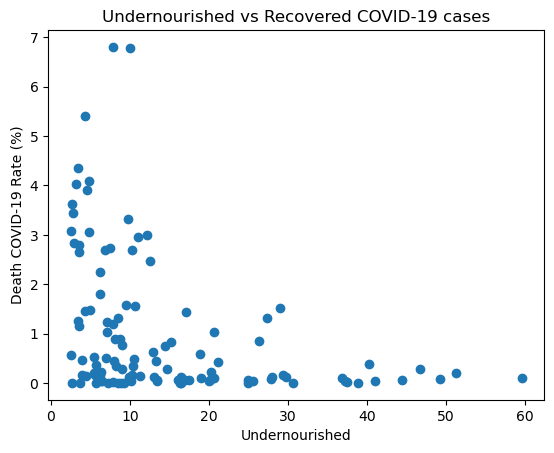

In [43]:
x_values = df['Undernourished']
y_values = calorie_data['Recovered']
plt.scatter(x_values, y_values)
plt.title("Undernourished vs Recovered COVID-19 cases")
plt.xlabel("Undernourished")
plt.ylabel("Death COVID-19 Rate (%)")

##Add global average values to plot


plt.show()